In [63]:
%autosave 0

Autosave disabled


In [76]:
#Implort the libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import Counter
import numpy as np

In [77]:
# Read the CSV data
df = pd.read_csv('IsomerDatasheet4.csv')

# Now 'df' is a DataFrame containing the CSV data. You can view the first few rows with df.head()
print(df.head())
#column 1 (A): Z (protons)
#column 2 (B): N (neutrons)
#colums 3 (C): A (atomic mass number)
#column 4 (D): S (Chemical Element)
#column 5 (E): Th (Modified half life)
#column 6 (F): uTh (Uncertainty half life)
#column 7 (G): mTh (Multiplier half life)
#column 6 (H): E (Gamma Energy KeV)
#column 7 (I): uE (Uncertainty Gamma)
#column 8 (J): L (Decay Rate)

    Z   N   A   S       Th           mTh         E             L
0  26  31  57  Fe    98.04  1.000000e-09   14.4129  7.070045e+06
1  26  31  57  Fe   100.00  1.000000e-09   14.4129  6.931472e+06
2  21  37  58  Sc   776.00  1.000000e-09  580.0000  8.932309e+05
3  21  37  58  Sc  1123.00  1.000000e-09  580.0000  6.172281e+05
4  21  37  58  Sc  1185.00  1.000000e-09  412.5000  5.849343e+05


In [78]:
print(df['Th'].dtype)
print(df['mTh'].dtype)
print(df['E'].dtype)
print(df.columns)

float64
float64
float64
Index(['Z', 'N', 'A', 'S', 'Th', 'mTh', 'E', 'L'], dtype='object')


### Neutron magic numbers: 2, 8, 20, 28, 50, 82, 126, 184
### Proton magic numbers: 2, 8, 20, 28, 50, 82, 114

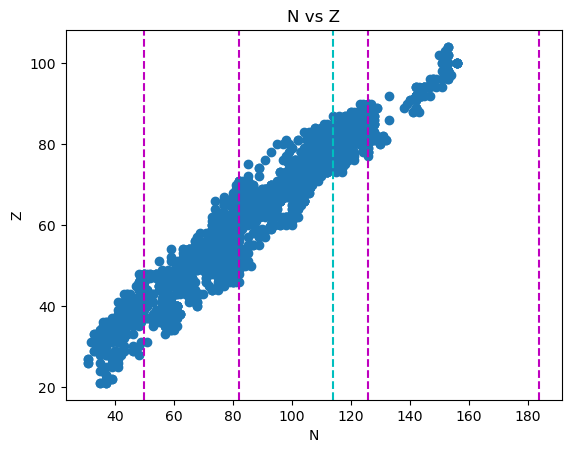

In [106]:
# Scatter plot
plt.scatter(df['N'], df['Z'])
plt.axvline(x=50, color='m', ls='--')
plt.axvline(x=82, color='m', ls='--')
plt.axvline(x=126, color='m', ls='--')
plt.axvline(x=114, color='c', ls='--')
plt.axvline(x=184, color='m', ls='--')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('N vs Z')
plt.show()

In [107]:
#Interactive 3D plot
fig = go.Figure(data=go.Scatter3d(
    x=df['N'], 
    y=df['Z'], 
    z=df['A'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['A'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='N',
                             yaxis_title='Z',
                             zaxis_title='A'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

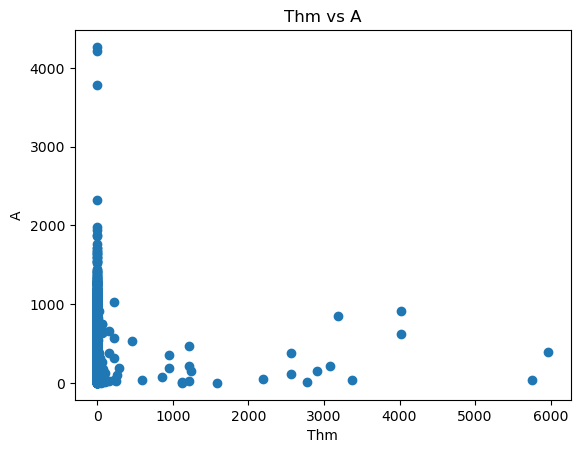

In [81]:
df['Thm'] = df['Th'] * df['mTh']

plt.scatter(df['Thm'], df['E'])
plt.xlabel('Thm')
plt.ylabel('A')
plt.title('Thm vs A')
plt.show()

In [82]:
fig = go.Figure(data=go.Scatter3d(
    x=df['A'], 
    y=df['Thm'], 
    z=df['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='A',
                             yaxis_title='Th',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [71]:
print(df.columns)

Index(['Z', 'N', 'A', 'S', 'Th', 'mTh', 'E', 'L', 'Thm'], dtype='object')


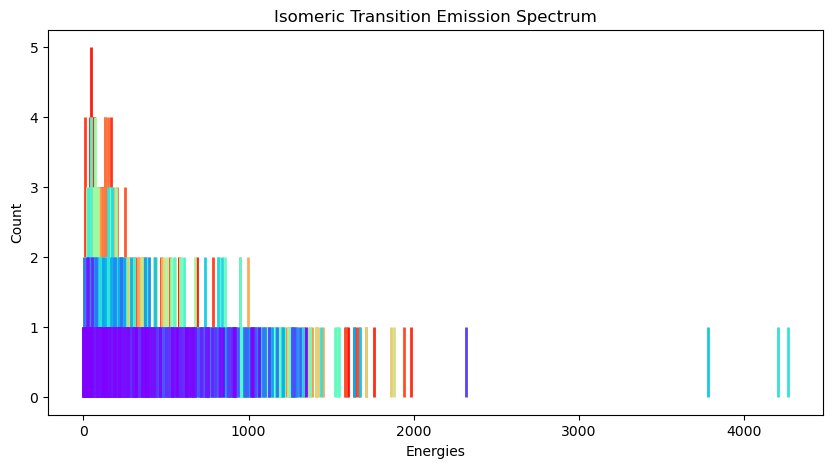

In [87]:
Energies = df['E']

# Count the frequencies
counts = Counter(Energies)

# Create a colormap and reverse it
colors = cm.rainbow(np.linspace(0, 1, len(counts)))[::-1]

# Set the figure size
plt.figure(figsize=(10, 5))

# Create vertical lines
for value, color in zip(counts.keys(), colors):
    plt.vlines(x=value, ymin=0, ymax=counts[value], colors=color, linewidth=2)

# Add a title and labels
plt.title('All Isomeric Transition Emission Spectrum')
plt.xlabel('Energies')
plt.ylabel('Count')

plt.show()

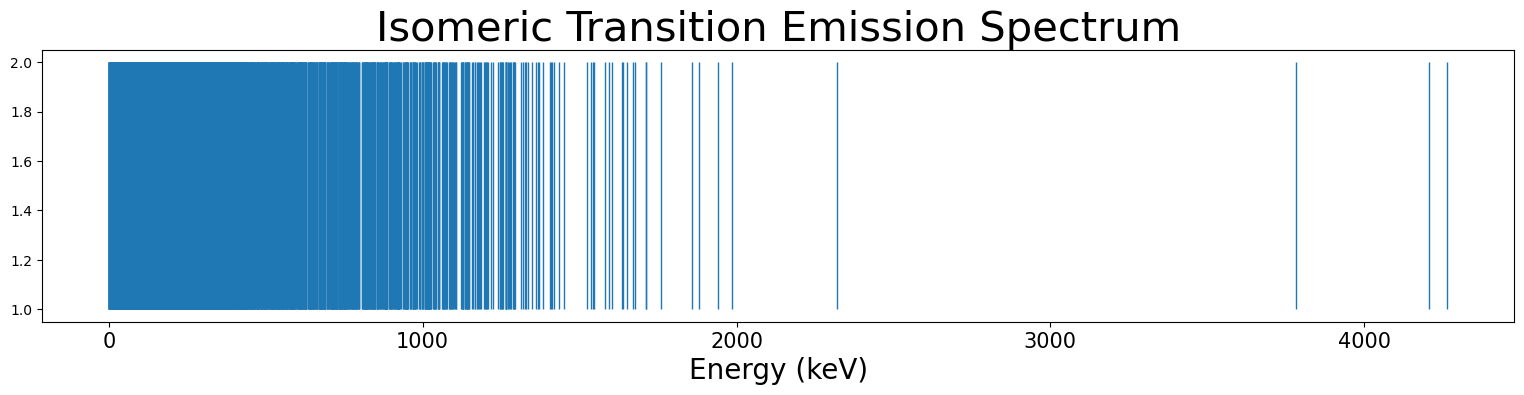

In [86]:
intensities = [1]  # Example intensities
fig = plt.figure(figsize=(19, 4))  # Adjust the figure size as per your preference
plt.vlines(Energies, 2, intensities, linewidth=1)  # Increase the line width for better visibility
plt.xlabel('Energy (keV)', fontsize=20)  # X-axis label
plt.title('Isomeric Transition Emission Spectrum', fontsize=30)  # Graph title
plt.tick_params(axis='x', labelsize=15)
plt.subplots_adjust(bottom=0.2)  # Add some spacing at the bottom

plt.show()

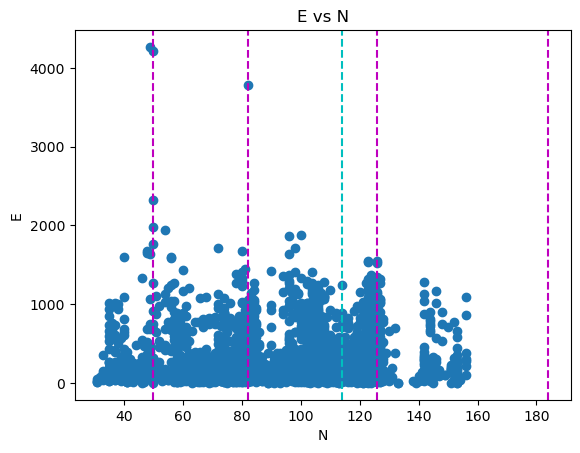

In [108]:
# Scatter plot
plt.scatter(df['N'], df['E'])
plt.axvline(x=50, color='m', ls='--')
plt.axvline(x=82, color='m', ls='--')
plt.axvline(x=126, color='m', ls='--')
plt.axvline(x=114, color='c', ls='--')
plt.axvline(x=184, color='m', ls='--')
plt.xlabel('N')
plt.ylabel('E')
plt.title('E vs N')
plt.show()

In [72]:
# Read the CSV data
dfmusec = pd.read_csv('IsomerDatasheet4microsec.csv')

fig = go.Figure(data=go.Scatter3d(
    x=dfmusec['A'], 
    y=dfmusec['Th'], 
    z=dfmusec['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='A',
                             yaxis_title='Th',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

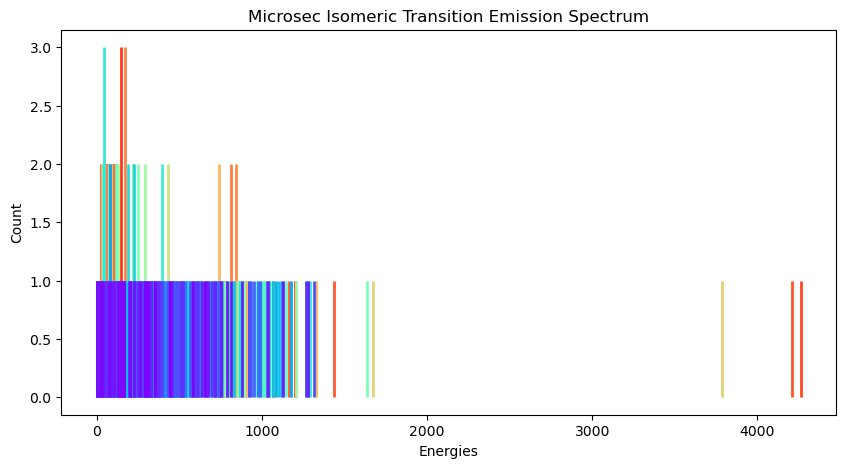

In [89]:
Emusec = dfmusec['E']

# Count the frequencies
counts = Counter(Emusec)

# Create a colormap and reverse it
colors = cm.rainbow(np.linspace(0, 1, len(counts)))[::-1]

# Set the figure size
plt.figure(figsize=(10, 5))

# Create vertical lines
for value, color in zip(counts.keys(), colors):
    plt.vlines(x=value, ymin=0, ymax=counts[value], colors=color, linewidth=2)

# Add a title and labels
plt.title('Microsec Isomeric Transition Emission Spectrum')
plt.xlabel('Energies')
plt.ylabel('Count')

plt.show()

In [111]:
fig = go.Figure(data=go.Scatter3d(
    x=dfmusec['N'], 
    y=dfmusec['A'], 
    z=dfmusec['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='N',
                             yaxis_title='A',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

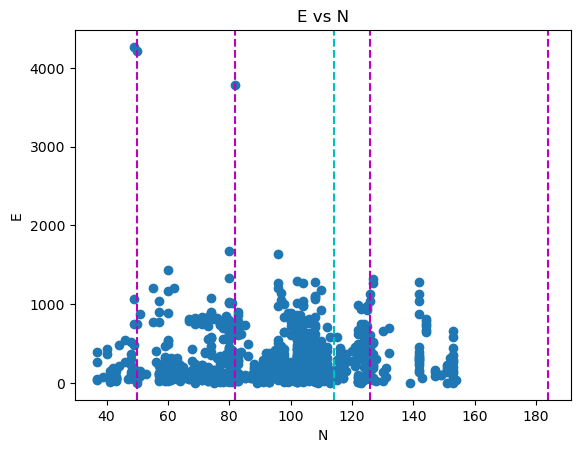

In [109]:
# Scatter plot
plt.scatter(dfmusec['N'], dfmusec['E'])
plt.axvline(x=50, color='m', ls='--')
plt.axvline(x=82, color='m', ls='--')
plt.axvline(x=126, color='m', ls='--')
plt.axvline(x=114, color='c', ls='--')
plt.axvline(x=184, color='m', ls='--')
plt.xlabel('N')
plt.ylabel('E')
plt.title('E vs N')
plt.show()

In [73]:
# Read the CSV data
dfmsec = pd.read_csv('IsomerDatasheet4milisec.csv')

fig = go.Figure(data=go.Scatter3d(
    x=dfmsec['A'], 
    y=dfmsec['Th'], 
    z=dfmsec['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='A',
                             yaxis_title='Th',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

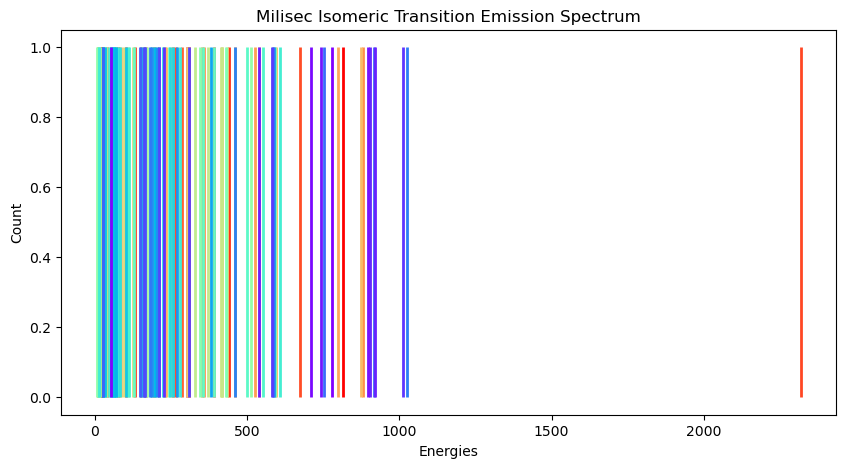

In [91]:
Emsec = dfmsec['E']

# Count the frequencies
counts = Counter(Emsec)

# Create a colormap and reverse it
colors = cm.rainbow(np.linspace(0, 1, len(counts)))[::-1]

# Set the figure size
plt.figure(figsize=(10, 5))

# Create vertical lines
for value, color in zip(counts.keys(), colors):
    plt.vlines(x=value, ymin=0, ymax=counts[value], colors=color, linewidth=2)

# Add a title and labels
plt.title('Milisec Isomeric Transition Emission Spectrum')
plt.xlabel('Energies')
plt.ylabel('Count')

plt.show()

In [112]:
fig = go.Figure(data=go.Scatter3d(
    x=dfmsec['N'], 
    y=dfmsec['A'], 
    z=dfmsec['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='Z',
                             yaxis_title='A',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

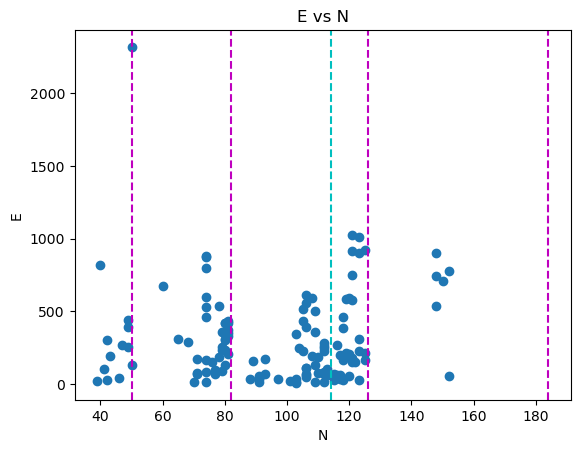

In [110]:
# Scatter plot
plt.scatter(dfmsec['N'], dfmsec['E'])
plt.axvline(x=50, color='m', ls='--')
plt.axvline(x=82, color='m', ls='--')
plt.axvline(x=126, color='m', ls='--')
plt.axvline(x=114, color='c', ls='--')
plt.axvline(x=184, color='m', ls='--')
plt.xlabel('N')
plt.ylabel('E')
plt.title('E vs N')
plt.show()

In [74]:
# Read the CSV data
dfsec = pd.read_csv('IsomerDatasheet4sec.csv')

fig = go.Figure(data=go.Scatter3d(
    x=dfsec['A'], 
    y=dfsec['Th'], 
    z=dfsec['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='A',
                             yaxis_title='Th',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

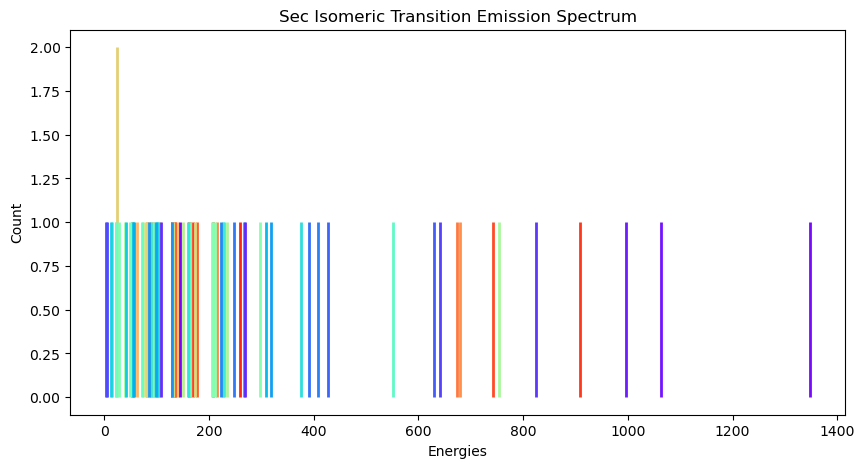

In [92]:
Esec = dfsec['E']

# Count the frequencies
counts = Counter(Esec)

# Create a colormap and reverse it
colors = cm.rainbow(np.linspace(0, 1, len(counts)))[::-1]

# Set the figure size
plt.figure(figsize=(10, 5))

# Create vertical lines
for value, color in zip(counts.keys(), colors):
    plt.vlines(x=value, ymin=0, ymax=counts[value], colors=color, linewidth=2)

# Add a title and labels
plt.title('Sec Isomeric Transition Emission Spectrum')
plt.xlabel('Energies')
plt.ylabel('Count')

plt.show()

In [113]:
fig = go.Figure(data=go.Scatter3d(
    x=dfsec['N'], 
    y=dfsec['A'], 
    z=dfsec['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='N',
                             yaxis_title='A',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [75]:
# Read the CSV data
dfmin = pd.read_csv('IsomerDatasheet4min.csv')

fig = go.Figure(data=go.Scatter3d(
    x=dfmin['A'], 
    y=dfmin['Th'], 
    z=dfmin['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='A',
                             yaxis_title='Th',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

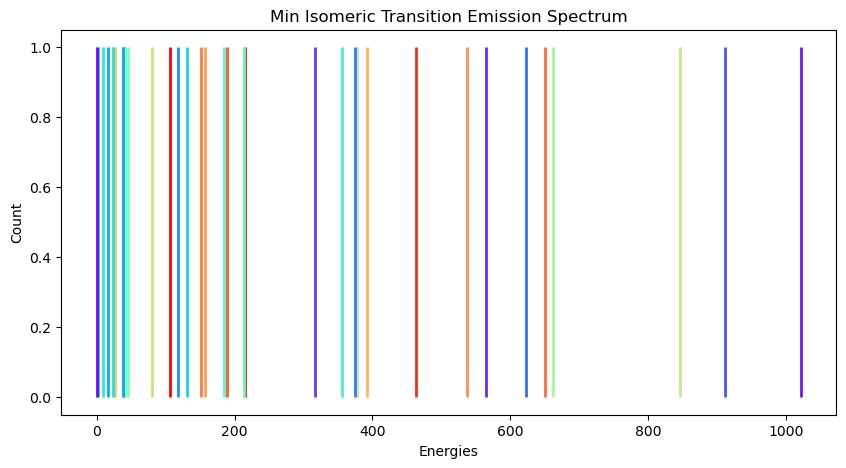

In [93]:
Emin = dfmin['E']

# Count the frequencies
counts = Counter(Emin)

# Create a colormap and reverse it
colors = cm.rainbow(np.linspace(0, 1, len(counts)))[::-1]

# Set the figure size
plt.figure(figsize=(10, 5))

# Create vertical lines
for value, color in zip(counts.keys(), colors):
    plt.vlines(x=value, ymin=0, ymax=counts[value], colors=color, linewidth=2)

# Add a title and labels
plt.title('Min Isomeric Transition Emission Spectrum')
plt.xlabel('Energies')
plt.ylabel('Count')

plt.show()

In [114]:
fig = go.Figure(data=go.Scatter3d(
    x=dfmin['N'], 
    y=dfmin['A'], 
    z=dfmin['E'],
    mode='markers',
    marker=dict(
        size=4,   # adjust the size of the scatter points
        color=df['E'],  # use the z values for color scale
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8   # transparency of the points
    )))

fig.update_layout(scene=dict(xaxis_title='Z',
                             yaxis_title='A',
                             zaxis_title='E'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

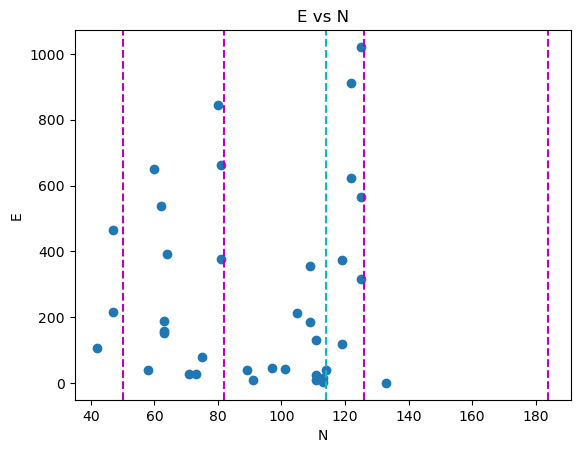

In [115]:
# Scatter plot
plt.scatter(dfmin['N'], dfmin['E'])
plt.axvline(x=50, color='m', ls='--')
plt.axvline(x=82, color='m', ls='--')
plt.axvline(x=126, color='m', ls='--')
plt.axvline(x=114, color='c', ls='--')
plt.axvline(x=184, color='m', ls='--')
plt.xlabel('N')
plt.ylabel('E')
plt.title('E vs N')
plt.show()